In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
from folium.plugins import HeatMap
from scipy.stats.mstats import winsorize

In [2]:
df_listing=pd.read_csv('2_listing.csv')
df_listing_num=df_listing._get_numeric_data()
df_listing_winsor = df_listing.drop(df_listing[df_listing['review_scores_location'] < 3.5].index)
df_listing.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17891.0,https://www.airbnb.com/rooms/17891,2.020000e+13,9/16/2022,previous scrape,Large Light Filled Loft,"Gorgeous and spacious loft, in the best locati...",Best neighborhood in Hong Kong! A mix of old a...,https://a0.muscache.com/pictures/119686/6ced58...,69063,...,4.93,4.90,4.66,NaN,f,1,1,0,0,0.48
1,72571.0,https://www.airbnb.com/rooms/72571,2.020000e+13,9/16/2022,city scrape,SoHo off Hollywood Road 3A,"Located steps from Hollywood road, with new ea...",NaN,https://a0.muscache.com/pictures/2849554/d2262...,304876,...,4.51,4.73,4.13,NaN,f,10,6,4,0,1.07
2,103760.0,https://www.airbnb.com/rooms/103760,2.020000e+13,9/16/2022,city scrape,Central Centre 5 min walk to/from Central MTR,"Located right in the heart of Central, this 2 ...",NaN,https://a0.muscache.com/pictures/815221/056993...,304876,...,4.61,4.71,4.39,NaN,f,10,6,4,0,2.07
3,104626.0,https://www.airbnb.com/rooms/104626,2.020000e+13,9/16/2022,city scrape,Entire Flat - Next to Man Mo Temple,<b>The space</b><br />Situated in one of Hong ...,NaN,https://a0.muscache.com/pictures/1947265/ef01a...,544166,...,4.93,4.79,4.71,NaN,t,1,1,0,0,0.10
4,132773.0,https://www.airbnb.com/rooms/132773,2.020000e+13,9/16/2022,city scrape,Fabulous 2 Bdrm Aprt Open kitchen,"Nicely decorated, spacious 2 bedroom apartment...",The Sheung Wan neighbourhood is ever changing ...,https://a0.muscache.com/pictures/36936441/e4c1...,304876,...,4.64,4.38,4.37,NaN,f,10,6,4,0,1.59


# map

In [13]:
map = folium.Map(location=[22.28327, 114.14988], zoom_start = 11)

heatmap_data = [[row['latitude'],row['longitude']] for index, row in
             df_listing[['latitude', 'longitude']].iterrows()]
hm =  HeatMap(heatmap_data,min_opacity=0.3, max_zoom=1,radius=20).add_to(map)
map

# y='neighbourhood_cleansed'

<AxesSubplot: xlabel='review_scores_location', ylabel='availability_365'>

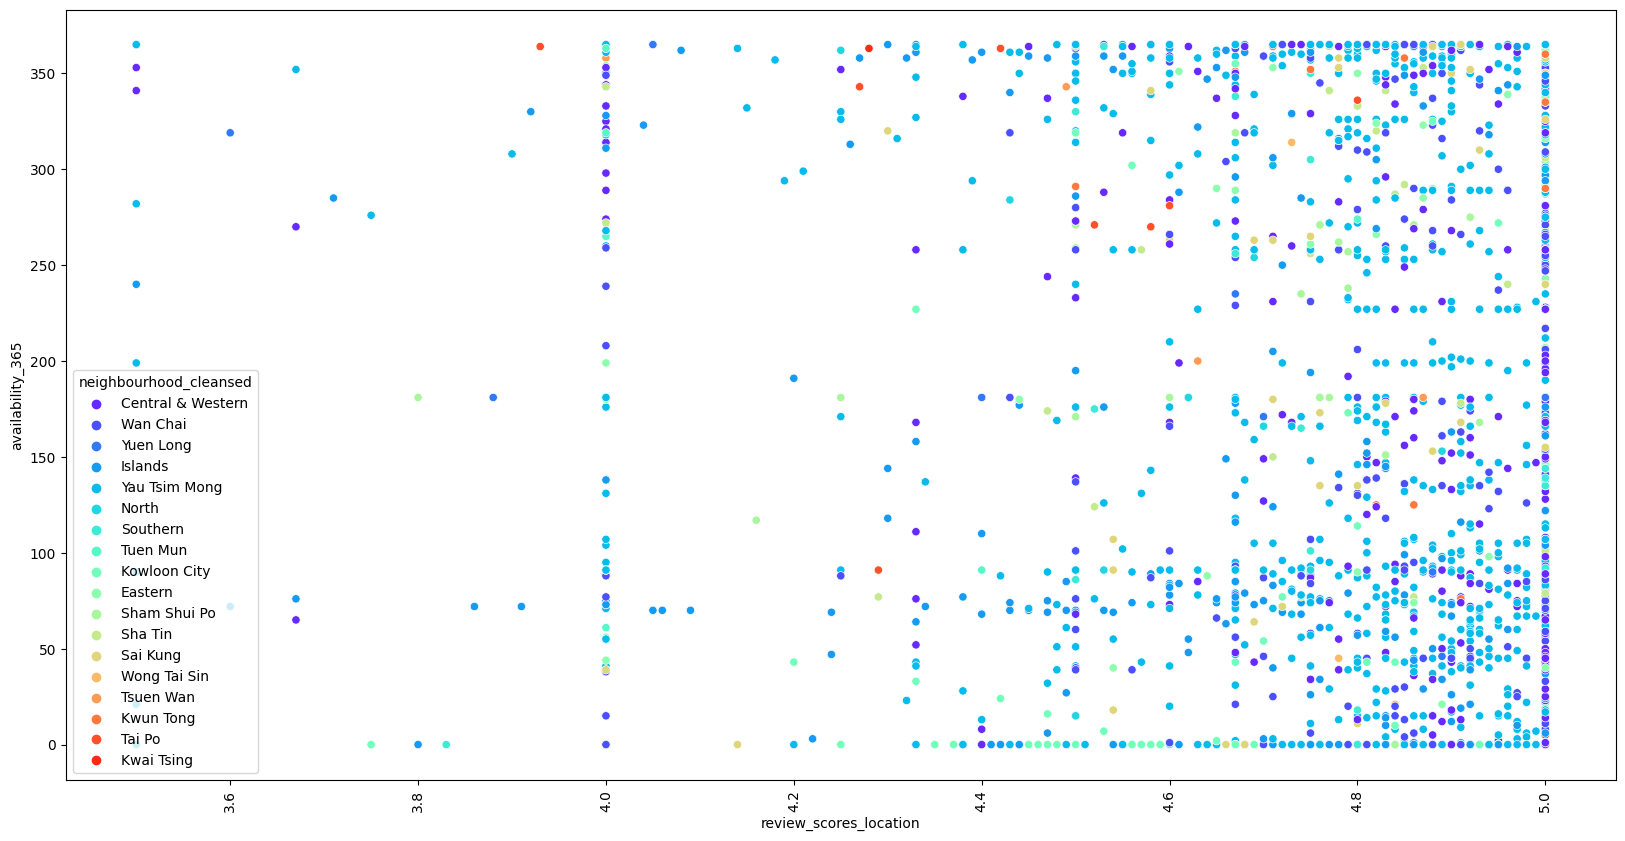

In [4]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.scatterplot(x='review_scores_location', hue='neighbourhood_cleansed',y='availability_365',palette='rainbow',data=df_listing_winsor)

<AxesSubplot: xlabel='price', ylabel='neighbourhood_cleansed'>

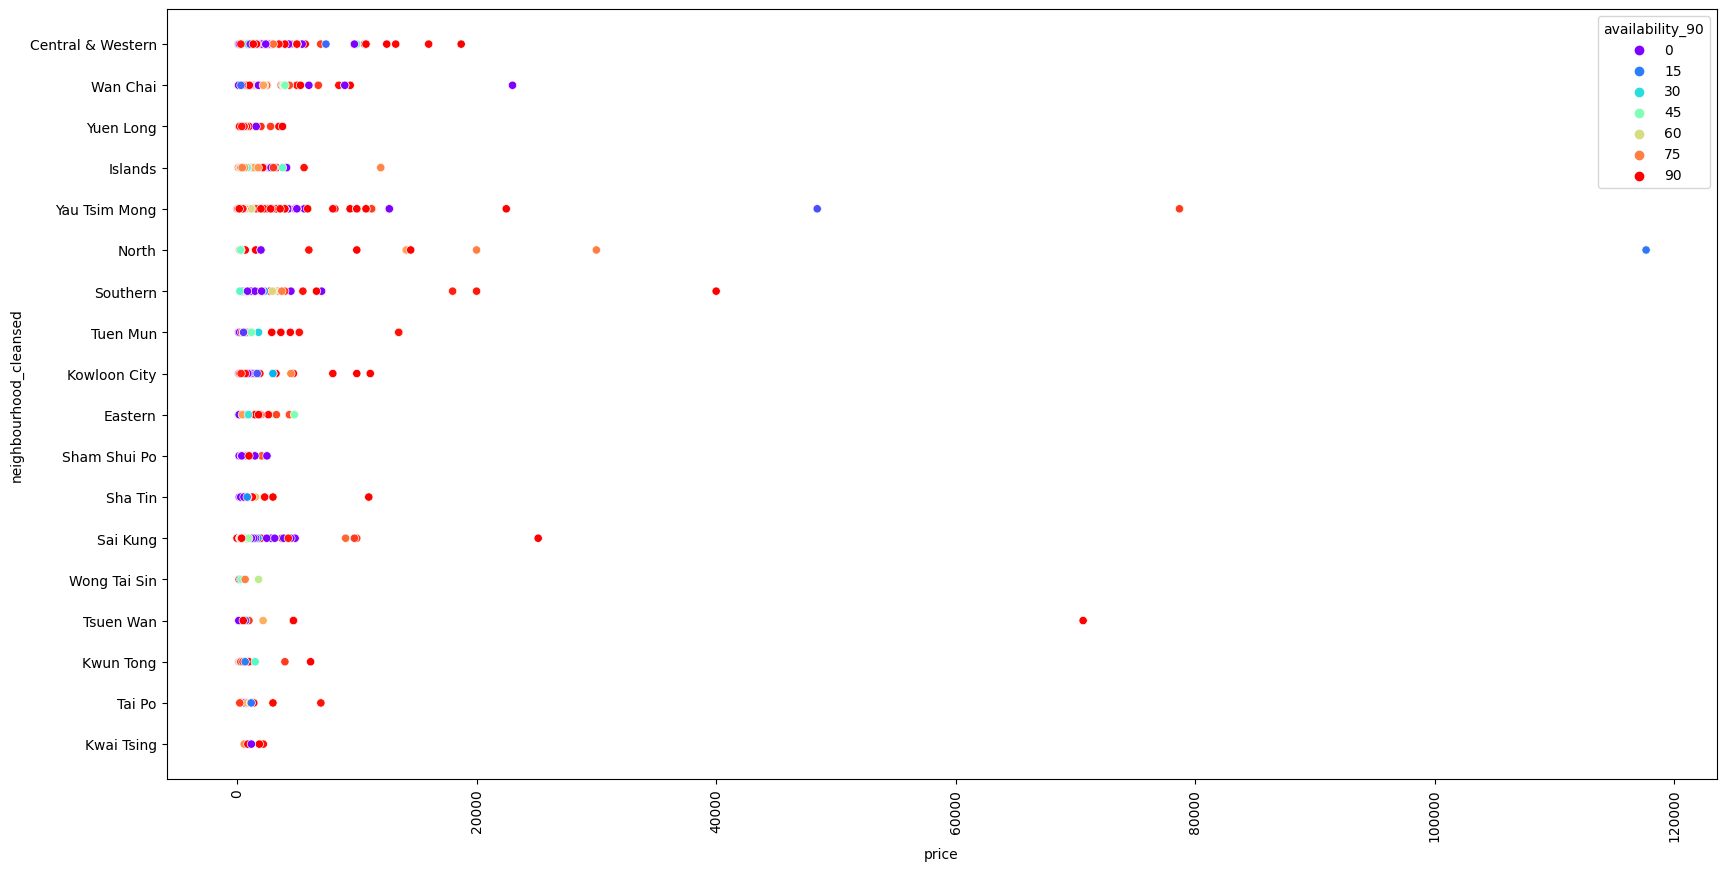

In [5]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.scatterplot(x='price', y='neighbourhood_cleansed',hue='availability_90',palette='rainbow',data=df_listing_winsor)